In [3]:
# loading the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # for KNN
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

# Load the data

In [7]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Preprocessing

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [13]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

# K Mean

### KMeans clustering is an **unsupervised machine learning algorithm** used to group data points into a specified number of clusters based on their features. It works by first randomly selecting a number of cluster centroids (centers), then assigning each data point to the nearest centroid based on distance — typically Euclidean distance. After all points are assigned, the centroids are recalculated as the mean of all the points in each cluster. This process of assignment and centroid updating continues iteratively until the centroids no longer move significantly, or a maximum number of iterations is reached. The goal of KMeans is to minimize the **within-cluster variance**, meaning that data points within each cluster should be as similar to each other as possible, and distinct from those in other clusters.


#Small and well-balanced (equal number of samples per class),
Numerical, making it compatible with the distance-based nature of KMeans,
 And exhibits some separability in the feature space, especially for petal-related features.
This combination makes it an ideal educational example to demonstrate how KMeans can uncover hidden structure in the data.

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


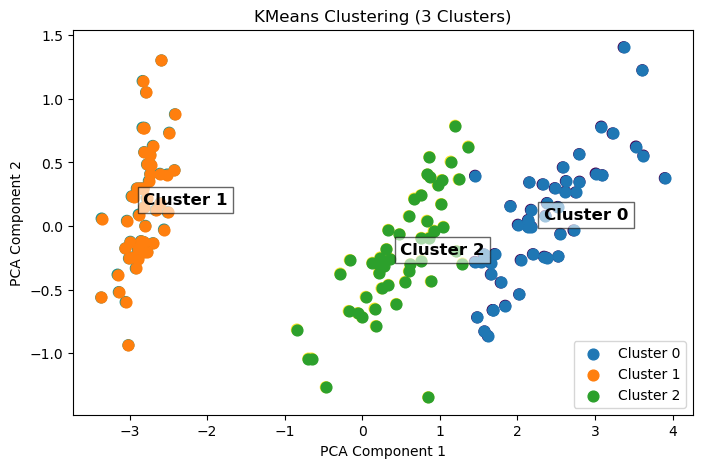

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df)
print(kmeans_labels)

pca = PCA(n_components=2)  # instantiate PCA object
PCA_result = pca.fit_transform(df)

plt.figure(figsize=(8,5))
plt.scatter(PCA_result[:, 0], PCA_result[:, 1], c=kmeans_labels, cmap='viridis', s=60)

clusters = np.unique(kmeans_labels)
for cluster in clusters:
    cluster_points = PCA_result[kmeans_labels == cluster]
    centroid = cluster_points.mean(axis=0)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=60, label=f'Cluster {cluster}')
    plt.text(centroid[0], centroid[1], f'Cluster {cluster}', fontsize=12, weight='bold',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))
plt.title("KMeans Clustering (3 Clusters)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [33]:
# Assuming kmeans_labels is a NumPy array and df is a DataFrame of features
cluster_0_points = df[kmeans_labels == 0]
cluster_1_points = df[kmeans_labels == 1]
cluster_2_points = df[kmeans_labels == 2]

print("🔹 Cluster 0 points:\n", cluster_0_points.head())
print("\n🔸 Cluster 1 points:\n", cluster_1_points.head())
print("\n🔻 Cluster 2 points:\n", cluster_2_points.head())


🔹 Cluster 0 points:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
77                 6.7               3.0                5.0               1.7   
100                6.3               3.3                6.0               2.5   
101                5.8               2.7                5.1               1.9   
102                7.1               3.0                5.9               2.1   
103                6.3               2.9                5.6               1.8   

     target  
77        1  
100       2  
101       2  
102       2  
103       2  

🔸 Cluster 1 points:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5             

# Hierarchial clustering


Hierarchical clustering is an unsupervised learning algorithm that builds a tree-like structure (dendrogram) to group data points based on their similarity. It doesn’t require specifying the number of clusters upfront.

There are two main types:

Agglomerative (bottom-up): Each point starts in its own cluster, and pairs of clusters are merged step-by-step based on their closeness.

Divisive (top-down): Starts with one big cluster and splits it into smaller ones recursively.

At each step, the algorithm measures the distance between clusters using methods like single linkage, complete linkage, or average linkage, and continues until all data points are in one cluster or a desired number of clusters is achieved.

The result is often visualized as a dendrogram, showing how clusters were formed.

Using this iris datasets
Natural Grouping:
The Iris dataset contains 3 known species, and hierarchical clustering is good at revealing natural nested groupings in such structured data.

Small Size & Low Dimensionality:
With only 150 samples and 4 features, the Iris dataset is ideal for hierarchical clustering, which can be computationally expensive on large datasets.

No Need to Predefine Number of Clusters:
Unlike KMeans, hierarchical clustering doesn’t require specifying the number of clusters in advance, which makes it useful when exploring the data initially.

Good for Visualization:
Dendrograms produced by hierarchical clustering allow us to visually inspect how similar the flowers are to each other and where natural splits occur.



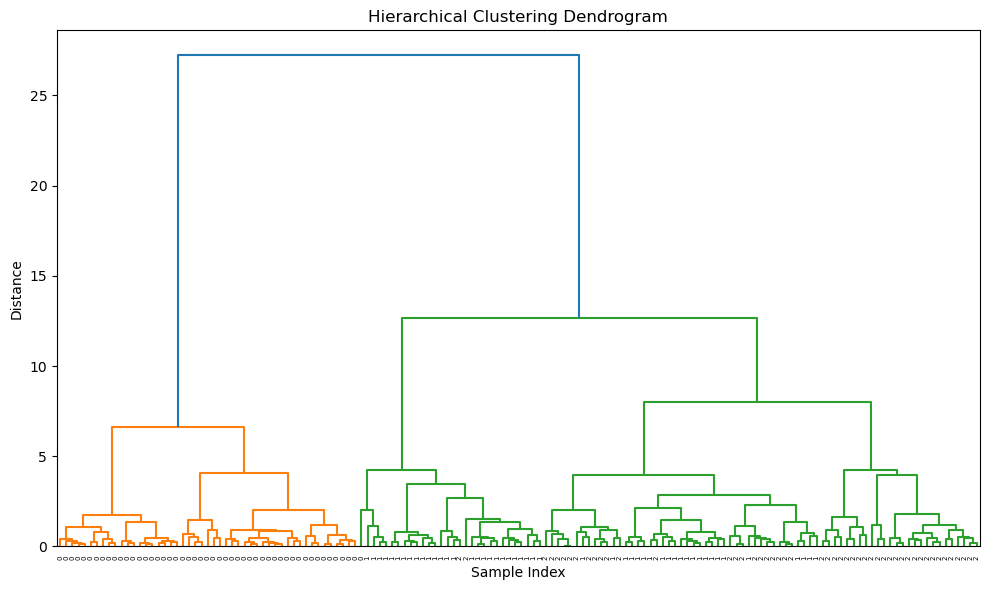

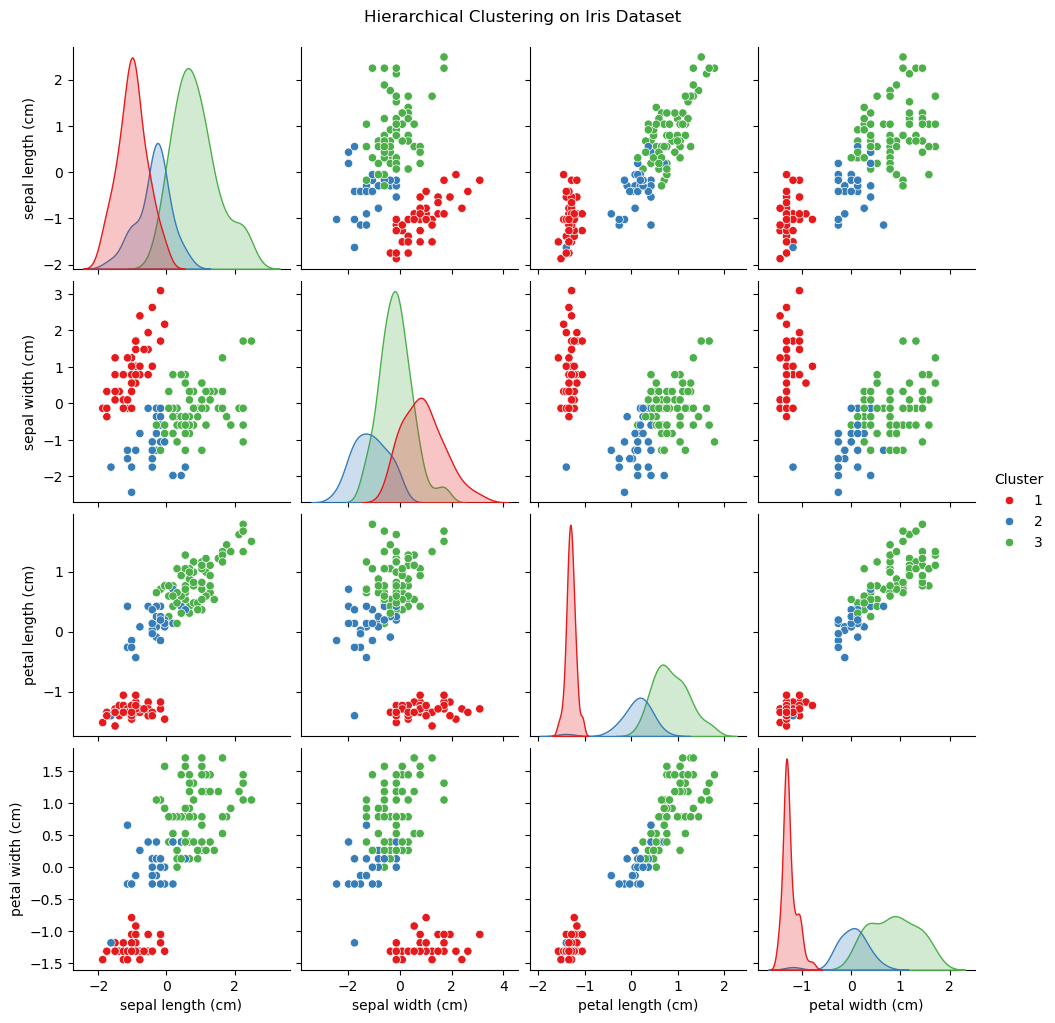

In [64]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import seaborn as sns

# Preprocess the data (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 1. Load the Iris dataset
iris = load_iris()# Step 0: Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data  # (150, 4)
feature_names = iris.feature_names

# Step 2: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Still (150, 4)

# Step 3: Hierarchical clustering
linked = linkage(X_scaled, method='ward')

# Step 4: Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True,
           labels=iris.target)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# Step 5: Form clusters
clusters = fcluster(linked, t=3, criterion='maxclust')  # Returns 1,2,3

#  Step 6: NOW create the DataFrame from JUST X_scaled (still 150x4)
df_iris = pd.DataFrame(X_scaled, columns=feature_names)

# Step 7: Add the cluster labels as a new column (makes it 150x5)
df_iris['Cluster'] = clusters

# Step 8: Visualize with seaborn
sns.pairplot(df_iris, hue='Cluster', palette='Set1', diag_kind='kde')
plt.suptitle('Hierarchical Clustering on Iris Dataset', y=1.02)
plt.show()

X = iris.data
feature_names = iris.feature_names